## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_127732_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (62126, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac        lng  \
0      GSABZT030K000A231215050  2024-06-25 10:25:00  NaN  6.26  114.25297   
1      GSABZT030K000A231215050  2024-06-25 10:30:00  NaN  6.49  114.25297   
2      GSABZT030K000A231215050  2024-06-25 10:35:00  NaN  0.00  114.25297   
3                          NaN                  NaN  NaN   NaN        NaN   
4                          NaN                  NaN  NaN   NaN        NaN   
...                        ...                  ...  ...   ...        ...   
62121  GSABZT030K000A231215050  2025-05-10 19:25:00  0.0  0.01  114.25297   
62122  GSABZT030K000A231215050  2025-05-10 19:30:00  0.0  0.01  114.25297   
62123  GSABZT030K000A231215050  2025-05-10 19:35:00  0.0  0.01  114.25297   
62124  GSABZT030K000A231215050  2025-05-10 19:40:00  0.0  0.01  114.25297   
62125  GSABZT030K000A231215050  2025-05-10 19:45:00  0.0  0.01  114.25297   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.211794     斜屋顶双坡   15.0             NaN                   NaN  ...   
1      30.211794     斜屋顶双坡   15.0         22.5852               81.4879  ...   
2      30.211794     斜屋顶双坡   15.0             NaN                   NaN  ...   
3            NaN       NaN    NaN         22.5342               81.6944  ...   
4            NaN       NaN    NaN         22.6082               81.7527  ...   
...          ...       ...    ...             ...                   ...  ...   
62121  30.211794     斜屋顶双坡   15.0             NaN                   NaN  ...   
62122  30.211794     斜屋顶双坡   15.0         17.2420               70.0755  ...   
62123  30.211794     斜屋顶双坡   15.0             NaN                   NaN  ...   
62124  30.211794     斜屋顶双坡   15.0             NaN                   NaN  ...   
62125  30.211794     斜屋顶双坡   15.0         16.9550               71.8909  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                       12.8911           216.4741          2.1082   
2                           NaN                NaN             NaN   
3                       19.7294           234.4804          2.1237   
4                       26.9605           254.0329          2.1440   
...                         ...                ...             ...   
62121                       NaN                NaN             NaN   
62122                    0.0000             0.0000          1.8783   
62123                       NaN                NaN             NaN   
62124                       NaN                NaN             NaN   
62125                    0.0000             0.0000          1.9257   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1              2.6493           2.7700            127.5693   
2                 NaN              NaN                 NaN   
3              2.6736           2.7964            132.2726   
4              2.6984           2.8222            136.0116   
...               ...              ...                 ...   
62121             NaN              NaN                 NaN   
62122          4.0786           4.7443            219.6588   
62123             NaN              NaN                 NaN   
62124             NaN              NaN                 NaN   
62125          4.2029           4.8940            214.0556   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                127.9489             128.1120  2024-06-25 10:30:00   
2                     NaN                  NaN                  NaN   
3                132.4143             132.4761  2024-06-25 10:45:00   
4                135.9858             135.9761  2024-06-25 11:00:00   
...                   ...                  ...                  ...   
62121                 NaN                  NaN             

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0     2024-06-25 10:25:00  GSABZT030K000A231215050  2024-06-25 10:25:00  NaN   
1     2024-06-25 10:30:00  GSABZT030K000A231215050  2024-06-25 10:30:00  NaN   
2     2024-06-25 10:35:00  GSABZT030K000A231215050  2024-06-25 10:35:00  NaN   
3     2024-06-25 10:40:00                      NaN                  NaN  NaN   
4     2024-06-25 10:45:00                      NaN                  NaN  NaN   
...                   ...                      ...                  ...  ...   
91980 2025-05-10 19:25:00  GSABZT030K000A231215050  2025-05-10 19:25:00  0.0   
91981 2025-05-10 19:30:00  GSABZT030K000A231215050  2025-05-10 19:30:00  0.0   
91982 2025-05-10 19:35:00  GSABZT030K000A231215050  2025-05-10 19:35:00  0.0   
91983 2025-05-10 19:40:00  GSABZT030K000A231215050  2025-05-10 19:40:00  0.0   
91984 2025-05-10 19:45:00  GSABZT030K000A231215050  2025-05-10 19:45:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      6.26  114.25297  30.211794     斜屋顶双坡   15.0             NaN  ...   
1      6.49  114.25297  30.211794     斜屋顶双坡   15.0         22.5852  ...   
2      0.00  114.25297  30.211794     斜屋顶双坡   15.0             NaN  ...   
3       NaN        NaN        NaN       NaN    NaN             NaN  ...   
4       NaN        NaN        NaN       NaN    NaN         22.5342  ...   
...     ...        ...        ...       ...    ...             ...  ...   
91980  0.01  114.25297  30.211794     斜屋顶双坡   15.0             NaN  ...   
91981  0.01  114.25297  30.211794     斜屋顶双坡   15.0         17.2420  ...   
91982  0.01  114.25297  30.211794     斜屋顶双坡   15.0             NaN  ...   
91983  0.01  114.25297  30.211794     斜屋顶双坡   15.0             NaN  ...   
91984  0.01  114.25297  30.211794     斜屋顶双坡   15.0         16.9550  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1               12.4697                   12.8911           216.4741   
2                   NaN                       NaN                NaN   
3                   NaN                       NaN                NaN   
4               19.1535                   19.7294           234.4804   
...                 ...                       ...                ...   
91980               NaN                       NaN                NaN   
91981            0.0000                    0.0000             0.0000   
91982               NaN                       NaN                NaN   
91983               NaN                       NaN                NaN   
91984            0.0000                    0.0000             0.0000   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1              2.1082          2.6493           2.7700            127.5693   
2                 NaN             NaN              NaN                 NaN   
3                 NaN             NaN              NaN                 NaN   
4              2.1237          2.6736           2.7964            132.2726   
...               ...             ...              ...                 ...   
91980             NaN             NaN              NaN                 NaN   
91981          1.8783          4.0786           4.7443            219.6588   
91982             NaN             NaN              NaN                 NaN   
91983             NaN             NaN              NaN                 NaN   
91984          1.9257          4.2029           4.8940            214.0556   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                127.9489             128.1120  2024-06-25 10:30:00  
2                     NaN                  NaN                  NaN  
3                     NaN                  NaN                  NaN  
4 

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    3,     4,     5,     6,     7,     8,     9,    10,    11,    12,
        ...
        91803, 91804, 91805, 91806, 91807, 91808, 91809, 91810, 91811, 91812],
       dtype='int64', length=44800),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    3,     4,     5,     6,     7,     8,     9,    10,    11,    12,
        ...
        91803, 91804, 91805, 91806, 91807, 91808, 91809, 91810, 91811, 91812],
       dtype='int64', length=44800),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
        ...
        91803, 91804, 91805, 91806, 91807, 91808, 91809, 91810, 91811, 91812],
       dtype='int64', length=44803),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    3,     4,     5,     6,     7,     8,     9,    10,    11,    12,
        ...
        91803, 91804, 91805, 91806, 91807, 91808, 91809, 91810, 91811, 91812],
       dtype='int64', length=44800),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    3,     4,     5,     6,     7,     8,     9,    10,    11,    12,
        ...
        91803, 91804, 91805, 91806, 91807, 91808, 91809, 91810, 91811, 91812],
       dtype='int64', length=44800),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    0,     2,     3,     5,     6,     8,     9,    11,    12,    14,
        ...
        91970, 91971, 91973, 91974, 91976, 91977, 91979, 91980, 91982, 91983],
       dtype='int64', length=61323),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0     2024-06-25 10:25:00  GSABZT030K000A231215050  2024-06-25 10:25:00  0.0   
1     2024-06-25 10:30:00  GSABZT030K000A231215050  2024-06-25 10:30:00  0.0   
2     2024-06-25 10:35:00  GSABZT030K000A231215050  2024-06-25 10:35:00  0.0   
3     2024-06-25 10:40:00  GSABZT030K000A231215050  2024-06-25 10:40:00  0.0   
4     2024-06-25 10:45:00  GSABZT030K000A231215050  2024-06-25 10:45:00  0.0   
...                   ...                      ...                  ...  ...   
91980 2025-05-10 19:25:00  GSABZT030K000A231215050  2025-05-10 19:25:00  0.0   
91981 2025-05-10 19:30:00  GSABZT030K000A231215050  2025-05-10 19:30:00  0.0   
91982 2025-05-10 19:35:00  GSABZT030K000A231215050  2025-05-10 19:35:00  0.0   
91983 2025-05-10 19:40:00  GSABZT030K000A231215050  2025-05-10 19:40:00  0.0   
91984 2025-05-10 19:45:00  GSABZT030K000A231215050  2025-05-10 19:45:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      6.26  114.25297  30.211794     斜屋顶双坡   15.0             NaN  ...   
1      6.49  114.25297  30.211794     斜屋顶双坡   15.0       22.585200  ...   
2      0.00  114.25297  30.211794     斜屋顶双坡   15.0       22.568200  ...   
3      0.00  114.25297  30.211794     斜屋顶双坡   15.0       22.551200  ...   
4      0.00  114.25297  30.211794     斜屋顶双坡   15.0       22.534200  ...   
...     ...        ...        ...       ...    ...             ...  ...   
91980  0.01  114.25297  30.211794     斜屋顶双坡   15.0       17.341933  ...   
91981  0.01  114.25297  30.211794     斜屋顶双坡   15.0       17.242000  ...   
91982  0.01  114.25297  30.211794     斜屋顶双坡   15.0       17.146333  ...   
91983  0.01  114.25297  30.211794     斜屋顶双坡   15.0       17.050667  ...   
91984  0.01  114.25297  30.211794     斜屋顶双坡   15.0       16.955000  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1             12.469700                 12.891100           216.4741   
2             14.697633                 15.170533           222.4762   
3             16.925567                 17.449967           228.4783   
4             19.153500                 19.729400           234.4804   
...                 ...                       ...                ...   
91980          0.000000                  0.000000             0.3618   
91981          0.000000                  0.000000             0.0000   
91982          0.000000                  0.000000             0.0000   
91983          0.000000                  0.000000             0.0000   
91984          0.000000                  0.000000             0.0000   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1            2.108200        2.649300         2.770000          127.569300   
2            2.113367        2.657400         2.778800          129.137067   
3            2.118533        2.665500         2.787600          130.704833   
4            2.123700        2.673600         2.796400          132.272600   
...               ...             ...              ...                 ...   
91980        1.866800        4.047067         4.706233          221.174933   
91981        1.878300        4.078600         4.744300          219.658800   
91982        1.894100        4.120033         4.794200          217.791067   
91983        1.909900        4.161467         4.844100          215.923333   
91984        1.925700        4.202900         4.894000          214.055600   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1              127.948900           128.112000  2024-06-25 10:30:00  
2              129.437367           129.566700                  NaN  
3              130.925833           131.021400                  NaN  
4 

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=91985, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-06-25 10:25:00 2024-06-25 10:25:00  GSABZT030K000A231215050   
2024-06-25 10:30:00 2024-06-25 10:30:00  GSABZT030K000A231215050   
2024-06-25 10:35:00 2024-06-25 10:35:00  GSABZT030K000A231215050   
2024-06-25 10:40:00 2024-06-25 10:40:00  GSABZT030K000A231215050   
2024-06-25 10:45:00 2024-06-25 10:45:00  GSABZT030K000A231215050   
...                                 ...                      ...   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT030K000A231215050   
2025-05-10 19:30:00 2025-05-10 19:30:00  GSABZT030K000A231215050   
2025-05-10 19:35:00 2025-05-10 19:35:00  GSABZT030K000A231215050   
2025-05-10 19:40:00 2025-05-10 19:40:00  GSABZT030K000A231215050   
2025-05-10 19:45:00 2025-05-10 19:45:00  GSABZT030K000A231215050   

                                     ts   er   pac        lng        lat  \
ts                                                                         
2024-06-25 10:25:00 2024-06-25 10:25:00  0.0  6.26  114.25297  30.211794   
2024-06-25 10:30:00 2024-06-25 10:30:00  0.0  6.49  114.25297  30.211794   
2024-06-25 10:35:00 2024-06-25 10:35:00  0.0  0.00  114.25297  30.211794   
2024-06-25 10:40:00 2024-06-25 10:40:00  0.0  0.00  114.25297  30.211794   
2024-06-25 10:45:00 2024-06-25 10:45:00  0.0  0.00  114.25297  30.211794   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:30:00 2025-05-10 19:30:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:35:00 2025-05-10 19:35:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:40:00 2025-05-10 19:40:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:45:00 2025-05-10 19:45:00  0.0  0.01  114.25297  30.211794   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-06-25 10:25:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-25 10:30:00     斜屋顶双坡   15.0       22.585200  ...         12.469700   
2024-06-25 10:35:00     斜屋顶双坡   15.0       22.568200  ...         14.697633   
2024-06-25 10:40:00     斜屋顶双坡   15.0       22.551200  ...         16.925567   
2024-06-25 10:45:00     斜屋顶双坡   15.0       22.534200  ...         19.153500   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.341933  ...          0.000000   
2025-05-10 19:30:00     斜屋顶双坡   15.0       17.242000  ...          0.000000   
2025-05-10 19:35:00     斜屋顶双坡   15.0       17.146333  ...          0.000000   
2025-05-10 19:40:00     斜屋顶双坡   15.0       17.050667  ...          0.000000   
2025-05-10 19:45:00     斜屋顶双坡   15.0       16.955000  ...          0.000000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-06-25 10:25:00                       NaN                NaN   
2024-06-25 10:30:00                 12.891100           216.4741   
2024-06-25 10:35:00                 15.170533           222.4762   
2024-06-25 10:40:00                 17.449967           228.4783   
2024-06-25 10:45:00                 19.729400           234.4804   
...                                       ...                ...   
2025-05-10 19:25:00                  0.000000             0.3618   
2025-05-10 19:30:00                  0.000000             0.0000   
2025-05-10 19:35:00                  0.000000             0.0000   
2025-05-10 19:40:00                  0.000000             0.0000   
2025-05-10 19:45:00                  0.000000             0.0000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-06-25 10:25:00             NaN             NaN              NaN   
2024-06-25 10:30:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-06-25 10:25:00 2024-06-25 10:25:00  GSABZT030K000A231215050   
2024-06-25 10:30:00 2024-06-25 10:30:00  GSABZT030K000A231215050   
2024-06-25 10:35:00 2024-06-25 10:35:00  GSABZT030K000A231215050   
2024-06-25 10:40:00 2024-06-25 10:40:00  GSABZT030K000A231215050   
2024-06-25 10:45:00 2024-06-25 10:45:00  GSABZT030K000A231215050   
...                                 ...                      ...   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT030K000A231215050   
2025-05-10 19:30:00 2025-05-10 19:30:00  GSABZT030K000A231215050   
2025-05-10 19:35:00 2025-05-10 19:35:00  GSABZT030K000A231215050   
2025-05-10 19:40:00 2025-05-10 19:40:00  GSABZT030K000A231215050   
2025-05-10 19:45:00 2025-05-10 19:45:00  GSABZT030K000A231215050   

                                     ts   er   pac        lng        lat  \
2024-06-25 10:25:00 2024-06-25 10:25:00  0.0  6.26  114.25297  30.211794   
2024-06-25 10:30:00 2024-06-25 10:30:00  0.0  6.49  114.25297  30.211794   
2024-06-25 10:35:00 2024-06-25 10:35:00  0.0  0.00  114.25297  30.211794   
2024-06-25 10:40:00 2024-06-25 10:40:00  0.0  0.00  114.25297  30.211794   
2024-06-25 10:45:00 2024-06-25 10:45:00  0.0  0.00  114.25297  30.211794   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:30:00 2025-05-10 19:30:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:35:00 2025-05-10 19:35:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:40:00 2025-05-10 19:40:00  0.0  0.01  114.25297  30.211794   
2025-05-10 19:45:00 2025-05-10 19:45:00  0.0  0.01  114.25297  30.211794   

                    roof_type  angle  temperature_2m  ...  \
2024-06-25 10:25:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-25 10:30:00     斜屋顶双坡   15.0       22.585200  ...   
2024-06-25 10:35:00     斜屋顶双坡   15.0       22.568200  ...   
2024-06-25 10:40:00     斜屋顶双坡   15.0       22.551200  ...   
2024-06-25 10:45:00     斜屋顶双坡   15.0       22.534200  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.341933  ...   
2025-05-10 19:30:00     斜屋顶双坡   15.0       17.242000  ...   
2025-05-10 19:35:00     斜屋顶双坡   15.0       17.146333  ...   
2025-05-10 19:40:00     斜屋顶双坡   15.0       17.050667  ...   
2025-05-10 19:45:00     斜屋顶双坡   15.0       16.955000  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-06-25 10:25:00                       NaN                NaN   
2024-06-25 10:30:00                 12.891100           216.4741   
2024-06-25 10:35:00                 15.170533           222.4762   
2024-06-25 10:40:00                 17.449967           228.4783   
2024-06-25 10:45:00                 19.729400           234.4804   
...                                       ...                ...   
2025-05-10 19:25:00                  0.000000             0.3618   
2025-05-10 19:30:00                  0.000000             0.0000   
2025-05-10 19:35:00                  0.000000             0.0000   
2025-05-10 19:40:00                  0.000000             0.0000   
2025-05-10 19:45:00                  0.000000             0.0000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-06-25 10:25:00             NaN             NaN              NaN   
2024-06-25 10:30:00        2.108200        2.649300         2.770000   
2024-06-25 10:35:00        2.113367        2.657400         2.778800   
2024-06-25 10:40:00        2.118533        2.665500         2.787600   
2024-06-25 10:45:00        2.123700        2.673600         2.796400   
...                             ...             ...              ...   
2025-05-10 19:25:00        1.866800        4.047067         4.706233   
2025-05-10 19:30:00        1.878300        4.078600         4.744300   
2025-05-10 19:35:00        1.894100        4.120033         4.794200   
2025-05-10 19:40:00        1.9

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-06-25 10:25:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(91985, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    17.971389
1        relative_humidity_2m    69.972466
2                dew_point_2m    11.907919
3                pressure_msl  1016.297516
4            surface_pressure  1012.129525
5   precipitation_probability    10.489756
6                 cloud_cover    56.204586
7             cloud_cover_low    13.596955
8             cloud_cover_mid    30.159490
9            cloud_cover_high    34.363016
10        shortwave_radiation   162.042068
11           direct_radiation    94.342412
12   direct_normal_irradiance   149.342108
13          diffuse_radiation    67.699656
14             wind_speed_10m     2.540420
15             wind_speed_80m     4.200686
16            wind_speed_120m     4.667973
17         wind_direction_10m   141.426760
18         wind_direction_80m   140.568766
19        wind_direction_120m   140.181647
20                   pac_copy     3.021563

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     99.827119
1        relative_humidity_2m    341.287886
2                dew_point_2m    101.176015
3                pressure_msl    107.188458
4            surface_pressure    103.750544
5   precipitation_probability    791.389228
6                 cloud_cover   1807.043113
7             cloud_cover_low    838.492214
8             cloud_cover_mid   1601.441266
9            cloud_cover_high   1706.666669
10        shortwave_radiation  55457.635923
11           direct_radiation  28032.394346
12   direct_normal_irradiance  52911.388746
13          diffuse_radiation   7570.418316
14             wind_speed_10m      2.096685
15             wind_speed_80m      4.400092
16            wind_speed_120m      5.323767
17         wind_direction_10m  10035.180206
18         wind_direction_80m   9796.497109
19        wind_direction_120m   9752.189860
20                   pac_copy     26.251999

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.991352
1        relative_humidity_2m           18.473979
2                dew_point_2m           10.058629
3                pressure_msl           10.353186
4            surface_pressure           10.185801
5   precipitation_probability           28.131641
6                 cloud_cover           42.509330
7             cloud_cover_low           28.956730
8             cloud_cover_mid           40.018012
9            cloud_cover_high           41.311822
10        shortwave_radiation          235.494450
11           direct_radiation          167.428774
12   direct_normal_irradiance          230.024757
13          diffuse_radiation           87.008151
14             wind_speed_10m            1.447993
15             wind_speed_80m            2.097640
16            wind_speed_120m            2.307329
17         wind_direction_10m          100.175747
18         wind_direction_80m           98.977256
19        wind_direction_120m           98.753176
20                   pac_copy            5.123670

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    38.8140
1        relative_humidity_2m    99.9663
2                dew_point_2m    28.5456
3                pressure_msl  1040.8010
4            surface_pressure  1036.3187
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.2227
11           direct_radiation   737.8847
12   direct_normal_irradiance   790.8193
13          diffuse_radiation   389.6253
14             wind_speed_10m    10.1884
15             wind_speed_80m    15.4503
16            wind_speed_120m    16.7571
17         wind_direction_10m   358.7980
18         wind_direction_80m   358.3558
19        wind_direction_120m   358.6706
20                   pac_copy    29.2000

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -3.7591
1        relative_humidity_2m    16.3007
2                dew_point_2m   -16.5420
3                pressure_msl   991.3342
4            surface_pressure   987.4837
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0758
15             wind_speed_80m     0.1567
16            wind_speed_120m     0.1584
17         wind_direction_10m     1.3429
18         wind_direction_80m     1.4838
19        wind_direction_120m     2.0312
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    18.155133
1        relative_humidity_2m    71.833600
2                dew_point_2m    12.408000
3                pressure_msl  1017.232567
4            surface_pressure  1013.054650
5   precipitation_probability     0.000000
6                 cloud_cover    69.749483
7             cloud_cover_low     0.006300
8             cloud_cover_mid     4.805533
9            cloud_cover_high     5.841500
10        shortwave_radiation    13.083850
11           direct_radiation     0.657483
12   direct_normal_irradiance     3.087517
13          diffuse_radiation    10.310900
14             wind_speed_10m     2.201500
15             wind_speed_80m     3.971317
16            wind_speed_120m     4.445967
17         wind_direction_10m   112.950183
18         wind_direction_80m   113.650483
19        wind_direction_120m   113.732883
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       11.892267               61.9530        5.9607   1010.056967   
0.666667       23.744700               80.9462       17.4573   1022.570500   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1006.016500                        0.0      18.2362   
0.666667       1018.285967                        0.0      97.9919   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333           0.0000           0.0135          0.002400  ...   
0.666667           2.4873          28.3807         52.918133  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         33.961333                 98.914133          96.365633   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        1.778800        3.075200         3.418700           76.753033   
0.666667        2.839767        4.915433         5.531633          192.521000   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333             76.8147              76.6168      0.00  
0.666667            192.9976             193.0675      1.84  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.142885      0.896596   
relative_humidity_2m            -0.142885              1.000000      0.303880   
dew_point_2m                     0.896596              0.303880      1.000000   
pressure_msl                    -0.878234             -0.113599     -0.892327   
surface_pressure                -0.875004             -0.116972     -0.890706   
precipitation_probability        0.014071              0.283502      0.133047   
cloud_cover                     -0.013413              0.113617      0.039975   
cloud_cover_low                 -0.143750              0.309882     -0.009101   
cloud_cover_mid                 -0.253409              0.078711     -0.201148   
cloud_cover_high                 0.245805              0.046315      0.255571   
shortwave_radiation              0.368632             -0.488441      0.129059   
direct_radiation                 0.355048             -0.471277      0.121502   
direct_normal_irradiance         0.302200             -0.503306      0.054524   
diffuse_radiation                0.314516             -0.415131      0.115502   
wind_speed_10m                   0.268893             -0.240391      0.155880   
wind_speed_80m                   0.144083             -0.090630      0.107545   
wind_speed_120m                  0.110850             -0.054689      0.092442   
wind_direction_10m               0.066748              0.075865      0.088197   
wind_direction_80m               0.076284              0.062382      0.092330   
wind_direction_120m              0.083540              0.058696      0.097657   
pac_copy                         0.351847             -0.518049      0.097810   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.878234         -0.875004   
relative_humidity_2m          -0.113599         -0.116972   
dew_point_2m                  -0.892327         -0.890706   
pressure_msl                   1.000000          0.999977   
surface_pressure               0.999977          1.000000   
precipitation_probability     -0.118211         -0.119435   
cloud_cover                   -0.040247         -0.040857   
cloud_cover_low                0.078620          0.077627   
cloud_cover_mid                0.205241          0.204312   
cloud_cover_high              -0.289576         -0.289658   
shortwave_radiation           -0.138103         -0.134707   
direct_radiation              -0.132961         -0.129712   
direct_normal_irradiance      -0.076727         -0.073512   
diffuse_radiation             -0.117932         -0.114992   
wind_speed_10m                -0.181111         -0.179572   
wind_speed_80m                -0.143286         -0.143028   
wind_speed_120m               -0.130063         -0.130108   
wind_direction_10m            -0.123764         -0.124368   
wind_direction_80m            -0.140610         -0.141283   
wind_direction_120m           -0.147875         -0.148535   
pac_copy                      -0.113021         -0.109566   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.014071    -0.013413   
relative_humidity_2m                        0.283502     0.113617   
dew_point_2m                                0.133047     0.039975   
pressure_msl                               -0.118211    -0.040247   
surface_pressure                           -0.119435    -0.040857   
precipitation_probability                   1.000000     0.313807   
cloud_cover                                 0.313807     1.000000   
cloud_cover_low                             0.379025     0.378617   
cloud_cover_mid                             0.411733     0.629478   
cloud_cover_high                            0.193032     0.657244   
shortwave_radiation                        -0.073715    -0.139084   
direct_radiation                           -0.110797    -0.249298   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.869221
1        relative_humidity_2m          0.052831
2                dew_point_2m          0.968724
3                pressure_msl          0.972061
4            surface_pressure          0.971896
5   precipitation_probability          0.406436
6                 cloud_cover          0.532074
7             cloud_cover_low          0.534592
8             cloud_cover_mid          0.585563
9            cloud_cover_high          0.516524
10        shortwave_radiation         -0.334848
11           direct_radiation         -0.235408
12   direct_normal_irradiance         -0.214509
13          diffuse_radiation         -0.383088
14             wind_speed_10m          0.554104
15             wind_speed_80m          0.571659
16            wind_speed_120m          0.536682
17         wind_direction_10m          0.401458
18         wind_direction_80m          0.425746
19        wind_direction_120m          0.433090
20                   pac_copy         -0.285089

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([104815.92081921, 116660.01398745, 177082.21860006]),
 'fft_periods': array([287, 143, 288])}

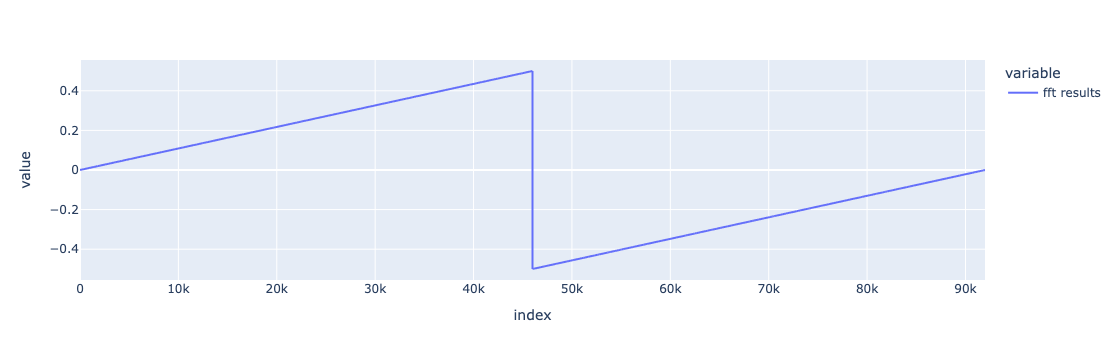

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -35.90663465528173,
  'P-value': 0.0,
  'Lags': np.int64(53),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -35.907
  P-value                         0.000
  Lags                               53
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-37.92206148115378),
  'P-value': 0.0,
  'Lags': 67,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -37.922
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -27.267456394182414,
  'P-value': 0.0,
  'Lags': np.int64(53),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -27.267
  P-value                         0.000
  Lags                               53
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}